In [66]:
from __future__ import print_function #for compatibility beteen python2 and python3
import numpy as np
import matplotlib as plt
import pylab as pl
import pandas as pd
import os
import seaborn as sns
import zipfile
import json
import warnings


from skhep.visual import MplPlotter as skh_plt # use this for ploting error bars


import statsmodels.api as sm
import statsmodels.formula.api as smf
from numpy import inf
import scipy as sp

%pylab inline
warnings.filterwarnings("ignore")

Populating the interactive namespace from numpy and matplotlib


In [3]:
#set environment to PUIDATA
puidata = os.getenv("PUIDATA")
if not puidata or puidata == '/nfshome/sjs909/PUIdata':
    puidata = '/nfshome/sjs909/PUIDATA'

os.environ["PUIDATA"] = puidata
os.environ["PUIDATA"]

'/nfshome/sjs909/PUIDATA'

In [4]:
# Read in data
ownership = pd.read_csv("%s/GunControl/World firearms murders and ownership.csv"%os.getenv("PUIDATA"))

In [5]:
ownership.columns

Index([u'Country/Territory', u'ISO code', u'Source',
       u'% of homicides by firearm', u'Number of homicides by firearm',
       u'Homicide by firearm rate per 100,000 pop',
       u'Rank by rate of ownership', u'Average firearms per 100 people',
       u'Average total all civilian firearms'],
      dtype='object')

In [6]:
ownership = ownership.drop([ 'ISO code', 'Source', '% of homicides by firearm',
       'Homicide by firearm rate per 100,000 pop', 'Rank by rate of ownership',
       'Average firearms per 100 people',
       ],axis=1)

In [7]:
ownership.head()

,Country/Territory,Number of homicides by firearm,Average total all civilian firearms
0,Albania,56.0,270000.0
1,Algeria,20.0,1900000.0
2,Angola,NaN,2800000.0
3,Anguilla,1.0,NaN
4,Argentina,1198.0,3950000.0


In [8]:
#with zipfile.ZipFile("%s/GunControl/API_SP.POP.TOTL_DS2_en_csv_v2_10203548.zip"%os.getenv("PUIDATA"),"r") as zip_ref:
#    zip_ref.extractall("TotalPop")

In [9]:
#Move into PUIDATA
#os.rename("/nfshome/sjs909/PUI2018/HW9_sjs909/TotalPop", "/nfshome/sjs909/PUIDATA/GunControl/TotalPop")

In [10]:
#gives total population 
pop = pd.read_csv("%s/GunControl/TotalPop/API_SP.POP.TOTL_DS2_en_csv_v2_10203548.csv"%os.getenv("PUIDATA"), header=2)

In [11]:
unique(pop['Indicator Name'])

array(['Population, total'], dtype=object)

In [12]:
pop.columns

Index([u'Country Name', u'Country Code', u'Indicator Name', u'Indicator Code',
       u'1960', u'1961', u'1962', u'1963', u'1964', u'1965', u'1966', u'1967',
       u'1968', u'1969', u'1970', u'1971', u'1972', u'1973', u'1974', u'1975',
       u'1976', u'1977', u'1978', u'1979', u'1980', u'1981', u'1982', u'1983',
       u'1984', u'1985', u'1986', u'1987', u'1988', u'1989', u'1990', u'1991',
       u'1992', u'1993', u'1994', u'1995', u'1996', u'1997', u'1998', u'1999',
       u'2000', u'2001', u'2002', u'2003', u'2004', u'2005', u'2006', u'2007',
       u'2008', u'2009', u'2010', u'2011', u'2012', u'2013', u'2014', u'2015',
       u'2016', u'2017', u'Unnamed: 62'],
      dtype='object')

In [13]:
pop = pop.drop(labels=['Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011',  '2013',
       '2014', '2015', '2016', '2017', 'Unnamed: 62'], axis=1)

In [14]:
pop.head()

,Country Name,2012
0,Aruba,102577.0
1,Afghanistan,30696958.0
2,Angola,25096150.0
3,Albania,2900401.0
4,Andorra,82431.0


In [15]:
# import gdp data
gdp = pd.read_csv("%s/GunControl/API_NY.GDP.MKTP.CD_DS2_en_csv_v2_10203569.csv"%os.getenv("PUIDATA"), header=2)

In [16]:
gdp = gdp.drop(labels=['Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011',  '2013',
       '2014', '2015', '2016', '2017', 'Unnamed: 62'], axis=1)

In [17]:
gdp.head()

,Country Name,2012
0,Aruba,NaN
1,Afghanistan,2.053654e+10
2,Angola,1.139232e+11
3,Albania,1.231978e+10
4,Andorra,3.164615e+09


In [18]:
ms = pd.read_csv("%s/GunControl/data-pvLFI.csv"%os.getenv("PUIDATA"))

In [19]:
#we want all the data in this file
ms.head()

,Country,Guns per 100 inhabitants,Number of mass shootings (1983-2013)
0,Australia,15.0,4
1,Austria,30.4,1
2,Belgium,17.2,2
3,Canada,30.8,4
4,Denmark,12.0,0


In [20]:
len(ms)

25

In [21]:
# now we can merge based on Country Name
#let's start with gdp and pop
gdpPop = pd.merge(pop, gdp, how='inner', on='Country Name')

In [22]:
#rename to gdp and pop
gdpPop = gdpPop.rename(columns = {'2012_x': 'pop', '2012_y': 'gdp'})

In [23]:
gdpPop.head()

,Country Name,pop,gdp
0,Aruba,102577.0,NaN
1,Afghanistan,30696958.0,2.053654e+10
2,Angola,25096150.0,1.139232e+11
3,Albania,2900401.0,1.231978e+10
4,Andorra,82431.0,3.164615e+09


In [24]:
pd.merge?

In [25]:
# let's merge with ownership
gdpPopOwnership = pd.merge(gdpPop, ownership, how='inner', left_on='Country Name',right_on='Country/Territory')

In [26]:
gdpPopOwnership.head()

,Country Name,pop,gdp,Country/Territory,Number of homicides by firearm,Average total all civilian firearms
0,Angola,25096150.0,1.139232e+11,Angola,NaN,2800000.0
1,Albania,2900401.0,1.231978e+10,Albania,56.0,270000.0
2,United Arab Emirates,8900453.0,3.745906e+11,United Arab Emirates,NaN,1000000.0
3,Argentina,42096739.0,5.459824e+11,Argentina,1198.0,3950000.0
4,Armenia,2881922.0,1.061932e+10,Armenia,9.0,380000.0


In [27]:
# final merge with ms
gunControl = pd.merge(gdpPopOwnership , ms, how='inner', left_on='Country Name',right_on='Country',sort=True,copy=False)

In [28]:
gunControl.head()

,Country Name,pop,gdp,Country/Territory,Number of homicides by firearm,Average total all civilian firearms,Country,Guns per 100 inhabitants,Number of mass shootings (1983-2013)
0,Australia,22742475.0,1.543411e+12,Australia,30.0,3050000.0,Australia,15.0,4
1,Austria,8429991.0,4.094252e+11,Austria,18.0,2500000.0,Austria,30.4,1
2,Belgium,11128246.0,4.978842e+11,Belgium,70.0,1800000.0,Belgium,17.2,2
3,Canada,34750545.0,1.824289e+12,Canada,173.0,9950000.0,Canada,30.8,4
4,Denmark,5591572.0,3.271489e+11,Denmark,15.0,650000.0,Denmark,12.0,0


In [29]:
gunControl.columns

Index([u'Country Name', u'pop', u'gdp', u'Country/Territory',
       u'Number of homicides by firearm',
       u'Average total all civilian firearms', u'Country',
       u'Guns per 100 inhabitants', u'Number of mass shootings (1983-2013)'],
      dtype='object')

In [30]:
gunControl = gunControl.drop(labels=['Country/Territory','Country'],axis=1)

In [31]:
gunControl.head()

,Country Name,pop,gdp,Number of homicides by firearm,Average total all civilian firearms,Guns per 100 inhabitants,Number of mass shootings (1983-2013)
0,Australia,22742475.0,1.543411e+12,30.0,3050000.0,15.0,4
1,Austria,8429991.0,4.094252e+11,18.0,2500000.0,30.4,1
2,Belgium,11128246.0,4.978842e+11,70.0,1800000.0,17.2,2
3,Canada,34750545.0,1.824289e+12,173.0,9950000.0,30.8,4
4,Denmark,5591572.0,3.271489e+11,15.0,650000.0,12.0,0


# Exploration

## Plot mass shooting vs gdp in absolute numbers, and per person. Show the errorbars (y errors)

In [32]:
#plot per person
gunControl['shootingspp'] = gunControl['Number of mass shootings (1983-2013)'] / gunControl['pop'] * 1e3

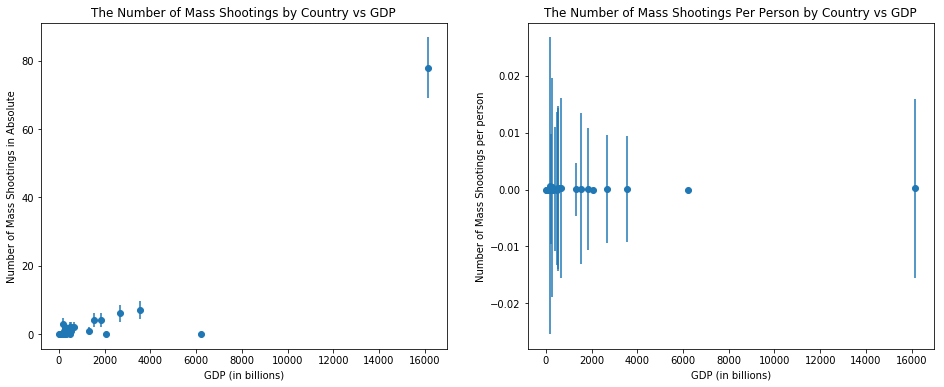

Number of mass shooting vs GDP, errors represent Poisson statistics.
The datapoint to the top right of the plot is the USA, which has both the highest GDP and the highest number of mass shootings


In [33]:
# do it as subplots
fig, ax = pl.subplots(2, figsize=(16,6))

pl.subplot(121)
scatter = pl.scatter(gunControl.gdp / 1e9, gunControl['Number of mass shootings (1983-2013)'])
pl.errorbar(gunControl.gdp / 1e9, gunControl['Number of mass shootings (1983-2013)'], 
            yerr = np.sqrt(gunControl['Number of mass shootings (1983-2013)'] * 1.0), fmt = '.')
pl.xlabel("GDP (in billions)")
pl.ylabel("Number of Mass Shootings in Absolute")
pl.ylim()
pl.title('The Number of Mass Shootings by Country vs GDP')

pl.subplot(122)
scatter = pl.scatter(gunControl.gdp / 1e9, gunControl['shootingspp'])
pl.errorbar(gunControl.gdp / 1e9, gunControl['shootingspp'], 
            yerr = np.sqrt(gunControl['shootingspp'] * 1.0), fmt = '.')
plt.xlabel("GDP (in billions)")
pl.ylabel("Number of Mass Shootings per person")
pl.ylim()
pl.title('The Number of Mass Shootings Per Person by Country vs GDP')

pl.show()
print ("Number of mass shooting vs GDP, " + 
       "errors represent Poisson statistics.\n" + 
       "The datapoint to the top right of the plot is the USA, " + 
       "which has both the highest GDP and the highest number of mass shootings")



Notice the outlier of the United States, which is very far from all the other points with regard to the number of mass shootings, as well as GDP. The error bar is also particularly longer than the other countries.

When we plot the number of mass shootings per person, the error bar we see is relatively long, showing a level of uncertainty. When we break this up the number of shootings per person, the United states becomes less of an outlier.  

## Plot the average number of civilian fire arms per person
## first without errors, then with errors. are there points that look like outliers?

In [34]:
# obtain average number of civilian fire arms per person per person
gunControl['armspp'] = gunControl['Average total all civilian firearms'] / gunControl['pop'] * 1e3

In [35]:
# Shoulda known USA would be wicked high
gunControl[gunControl['Country Name'] == 'United States']

,Country Name,pop,gdp,Number of homicides by firearm,Average total all civilian firearms,Guns per 100 inhabitants,Number of mass shootings (1983-2013),shootingspp,armspp
22,United States,313993272.0,1.615526e+13,9146.0,270000000.0,88.8,78,0.000248,859.891036


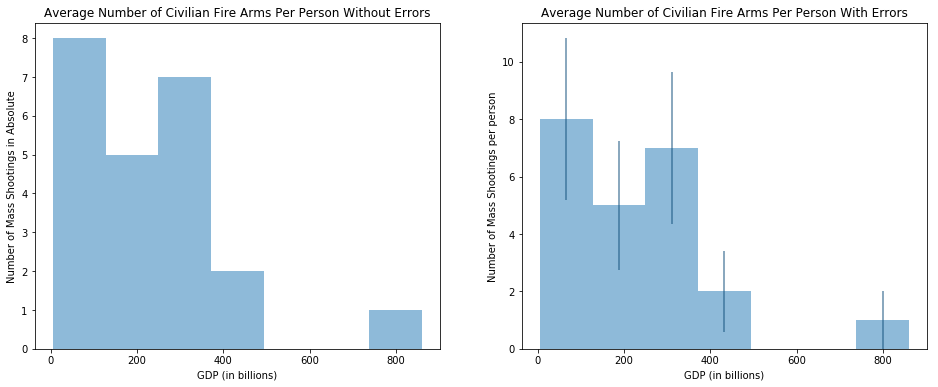

Average Number of Civilian Fire Arms Per Person, errors represent Gaussian statistics or √N .
The 1 bar to the right of the plot is the USA, which has the highest number of Civilian Fire Arms Per Person


In [36]:
fig, ax = pl.subplots(2, figsize=(16,6))

pl.subplot(121)
skh_plt.hist(gunControl['armspp'])
pl.xlabel("GDP (in billions)")
pl.ylabel("Number of Mass Shootings in Absolute")
pl.ylim()
pl.title('Average Number of Civilian Fire Arms Per Person Without Errors')

pl.subplot(122)
skh_plt.hist(gunControl['armspp'], errorbars=True,err_style='line')
plt.xlabel("GDP (in billions)")
pl.ylabel("Number of Mass Shootings per person")
pl.ylim()
pl.title('Average Number of Civilian Fire Arms Per Person With Errors')

pl.show()
print ("Average Number of Civilian Fire Arms Per Person, " + 
       "errors represent Gaussian statistics or √N .\n" + 
       "The 1 bar to the right of the plot is the USA, " + 
       "which has the highest number of Civilian Fire Arms Per Person")


The USA sure likes their guns, again they are an obvious outlier, with almost double the rest of the world's average number of firearms per person. 


The errors are shown with a line to mark the level of uncertainty for each country's aggregation. We see a relatively high level of uncertainty for each number of country.

## Plot the average number of homicide by fire arms per person

### First as a histogram

In [37]:
# obtain average number of civilian fire arms per person 
gunControl['homicidepp'] = gunControl['Number of homicides by firearm'] / gunControl['pop'] * 1e3

In [38]:
# a look at our outlier
gunControl[gunControl['Country Name'] == 'United States']

,Country Name,pop,gdp,Number of homicides by firearm,Average total all civilian firearms,Guns per 100 inhabitants,Number of mass shootings (1983-2013),shootingspp,armspp,homicidepp
22,United States,313993272.0,1.615526e+13,9146.0,270000000.0,88.8,78,0.000248,859.891036,0.029128


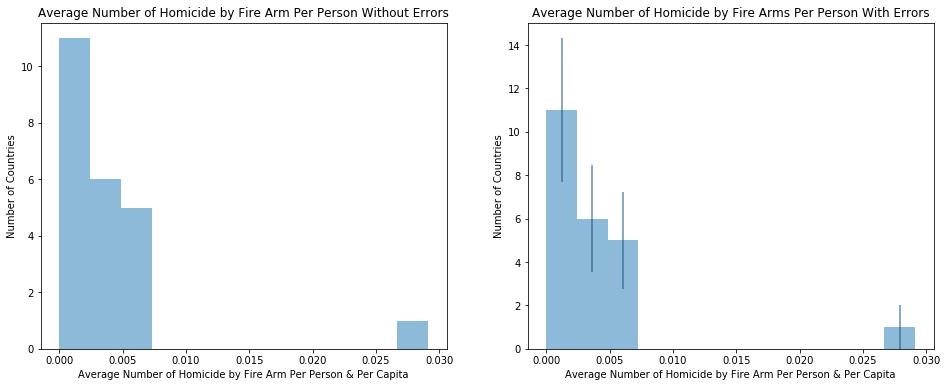

Average Number of Homicide by Fire Arm, errors represent Gaussian statistics or √N .
The 1 bar to the right of the plot is the USA, which has the highest number of Homicide by Fire Arm Per Person...shocker


In [39]:
fig, ax = pl.subplots(2, figsize=(16,6))

pl.subplot(121)
skh_plt.hist(gunControl['homicidepp'])
pl.xlabel("Average Number of Homicide by Fire Arm Per Person & Per Capita")
pl.ylabel("Number of Countries")
pl.ylim()
pl.title('Average Number of Homicide by Fire Arm Per Person Without Errors')

pl.subplot(122)
skh_plt.hist(gunControl['homicidepp'], errorbars=True,err_style='line')
plt.xlabel("Average Number of Homicide by Fire Arm Per Person & Per Capita")
pl.ylabel("Number of Countries")
pl.ylim()
pl.title('Average Number of Homicide by Fire Arms Per Person With Errors')

pl.show()
print ("Average Number of Homicide by Fire Arm, " + 
       "errors represent Gaussian statistics or √N .\n" + 
       "The 1 bar to the right of the plot is the USA, " + 
       "which has the highest number of Homicide by Fire Arm Per Person...shocker")


### Then against the country GDP, with statistical errors. are there points that look like outliers

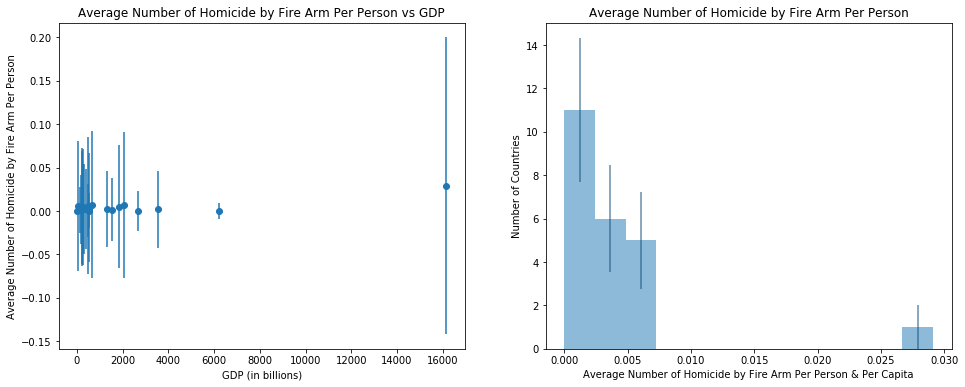

To the right, we have the Number of Homicide by Fire Arm vs GDP, errors represent Poisson statistics.
The datapoint furthest to the right of the plot is the USA, which has both the highest GDP and the higher number of  homicide by fire arm. This outlier is also apparent when we just look at average number of homicide by fire arm per   person without GDP.


In [40]:
fig, ax = pl.subplots(2, figsize=(16,6))

pl.subplot(121)
scatter = pl.scatter(gunControl.gdp / 1e9, gunControl['homicidepp'])
pl.errorbar(gunControl.gdp / 1e9, gunControl['homicidepp'], 
            yerr = np.sqrt(gunControl['homicidepp'] * 1.0), fmt = '.')
pl.xlabel("GDP (in billions)")
pl.ylabel("Average Number of Homicide by Fire Arm Per Person")
pl.ylim()
pl.title('Average Number of Homicide by Fire Arm Per Person vs GDP')

pl.subplot(122)
pl.subplot(122)
skh_plt.hist(gunControl['homicidepp'], errorbars=True,err_style='line')
plt.xlabel("Average Number of Homicide by Fire Arm Per Person & Per Capita")
pl.ylabel("Number of Countries")
pl.ylim()
pl.title('Average Number of Homicide by Fire Arm Per Person')


pl.show()
print ("To the right, we have the Number of Homicide by Fire Arm vs GDP, " + 
       "errors represent Poisson statistics.\n" + 
       "The datapoint furthest to the right of the plot is the USA, " + 
       "which has both the highest GDP and the higher number " + 
       "of  homicide by fire arm. This outlier is also apparent when we just look at average number " +
       "of homicide by fire arm per   person without GDP.")



## Plot the number of homicides by fire arm against the number of civilian firearms. plot the US in a different color

In [41]:
gunControl.head()

,Country Name,pop,gdp,Number of homicides by firearm,Average total all civilian firearms,Guns per 100 inhabitants,Number of mass shootings (1983-2013),shootingspp,armspp,homicidepp
0,Australia,22742475.0,1.543411e+12,30.0,3050000.0,15.0,4,0.000176,134.110294,0.001319
1,Austria,8429991.0,4.094252e+11,18.0,2500000.0,30.4,1,0.000119,296.560222,0.002135
2,Belgium,11128246.0,4.978842e+11,70.0,1800000.0,17.2,2,0.000180,161.750558,0.006290
3,Canada,34750545.0,1.824289e+12,173.0,9950000.0,30.8,4,0.000115,286.326445,0.004978
4,Denmark,5591572.0,3.271489e+11,15.0,650000.0,12.0,0,0.000000,116.246379,0.002683


In [42]:
# USA! USA! USA! she commented ironically
USA = gunControl[gunControl['Country Name'] == 'United States']

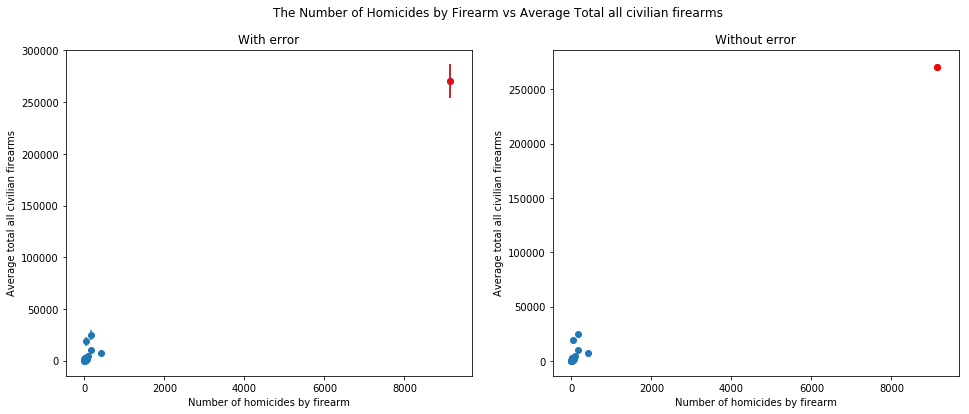

In [43]:
# do it as subplots
fig, ax = pl.subplots(2, figsize=(16,6))

pl.subplot(121)
scatter = pl.scatter(gunControl['Number of homicides by firearm'],
                     gunControl['Average total all civilian firearms']/ 1e3)
pl.errorbar(gunControl['Number of homicides by firearm'],
            gunControl['Average total all civilian firearms']/ 1e3, 
            yerr = np.sqrt(gunControl['Average total all civilian firearms']* 1.0), fmt = '.')
pl.scatter(USA['Number of homicides by firearm'], USA['Average total all civilian firearms']/ 1e3, c='red')
pl.errorbar(USA['Number of homicides by firearm'], USA['Average total all civilian firearms']/ 1e3, 
            yerr = np.sqrt(USA['Average total all civilian firearms']* 1.0), fmt = '.',c='red')
pl.xlabel("Number of homicides by firearm")
pl.ylabel("Average total all civilian firearms")
pl.ylim()
pl.title('With error')

pl.subplot(122)
scatter = pl.scatter(gunControl['Number of homicides by firearm'],
                     gunControl['Average total all civilian firearms']/ 1e3)
pl.scatter(USA['Number of homicides by firearm'], USA['Average total all civilian firearms']/ 1e3, c='red')
pl.xlabel("Number of homicides by firearm")
pl.ylabel("Average total all civilian firearms")
pl.ylim()
pl.title('Without error')


fig.suptitle('The Number of Homicides by Firearm vs Average Total all civilian firearms')
pl.show()

Here is a plot of the number of homicides by firearm vs average total of all civilian firearms for each country. Notice the United States highlighted in Red... Again the outlier with a significantly larger number of homicides by firearm with a large correlation with high number of civilian firearms. It would be interesting to find the various degree of gun control severity for each country and see if there was a relationship there. 

In [44]:
gunControl.head()

,Country Name,pop,gdp,Number of homicides by firearm,Average total all civilian firearms,Guns per 100 inhabitants,Number of mass shootings (1983-2013),shootingspp,armspp,homicidepp
0,Australia,22742475.0,1.543411e+12,30.0,3050000.0,15.0,4,0.000176,134.110294,0.001319
1,Austria,8429991.0,4.094252e+11,18.0,2500000.0,30.4,1,0.000119,296.560222,0.002135
2,Belgium,11128246.0,4.978842e+11,70.0,1800000.0,17.2,2,0.000180,161.750558,0.006290
3,Canada,34750545.0,1.824289e+12,173.0,9950000.0,30.8,4,0.000115,286.326445,0.004978
4,Denmark,5591572.0,3.271489e+11,15.0,650000.0,12.0,0,0.000000,116.246379,0.002683


### Plot the number of mass shootings against the number of civilian firearms. plot the US in a different color

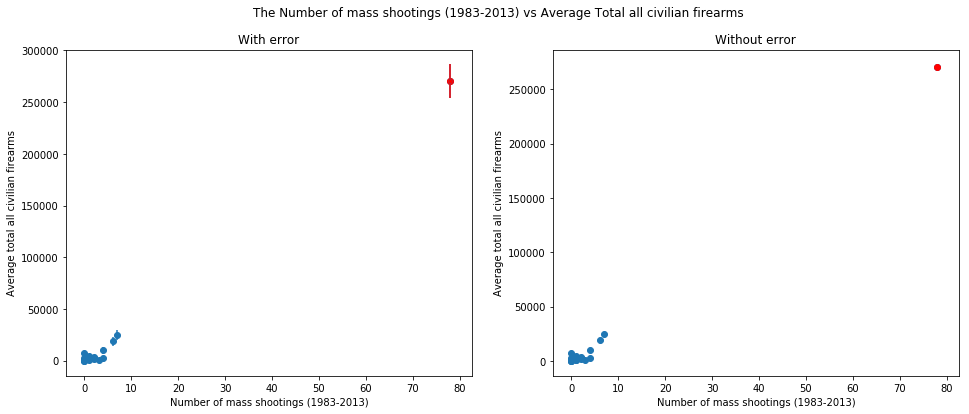

In [45]:
# do it as subplots
fig, ax = pl.subplots(2, figsize=(16,6))

pl.subplot(121)
scatter = pl.scatter(gunControl['Number of mass shootings (1983-2013)'],
                     gunControl['Average total all civilian firearms']/ 1e3)
pl.errorbar(gunControl['Number of mass shootings (1983-2013)'], 
            gunControl['Average total all civilian firearms']/ 1e3, 
            yerr = np.sqrt(gunControl['Average total all civilian firearms']* 1.0), fmt = '.')
pl.scatter(USA['Number of mass shootings (1983-2013)'], USA['Average total all civilian firearms']/ 1e3, c='red')
pl.errorbar(USA['Number of mass shootings (1983-2013)'], USA['Average total all civilian firearms']/ 1e3, 
            yerr = np.sqrt(USA['Average total all civilian firearms']* 1.0), fmt = '.',c='red')
pl.xlabel("Number of mass shootings (1983-2013)")
pl.ylabel("Average total all civilian firearms")
pl.ylim()
pl.title('With error')

pl.subplot(122)
scatter = pl.scatter(gunControl['Number of mass shootings (1983-2013)'],
                     gunControl['Average total all civilian firearms']/ 1e3)
pl.scatter(USA['Number of mass shootings (1983-2013)'], USA['Average total all civilian firearms']/ 1e3, c='red')
pl.xlabel("Number of mass shootings (1983-2013)")
pl.ylabel("Average total all civilian firearms")
pl.ylim()
pl.title('Without error')


fig.suptitle('The Number of mass shootings (1983-2013) vs Average Total all civilian firearms')
pl.show()


Here is a plot of the number of mass shootings vs average total of all civilian firearms for each country. Notice the United States highlighted in Red... Again the outlier with a significantly larger number of mass shootings with a large correlation with high number of civilian firearms. It seems any which way we slice it, the USA has a disproportionate amount of mass shootings, firearms and homicide. Maybe this should cause some changes in the United State's policy outlook.

# Modeling

## Fit a line to the Number of mass shootings per person as a function of Average total all civilian firearms per person.

In [46]:
#Make both quantities of the same order of magnitude
gunControl['magMassShootpp'] = gunControl['shootingspp']/gunControl['shootingspp'].mean()
gunControl['magarmspp'] =gunControl['armspp']/gunControl['armspp'].mean()

In [47]:
gunControl.head()

,Country Name,pop,gdp,Number of homicides by firearm,Average total all civilian firearms,Guns per 100 inhabitants,Number of mass shootings (1983-2013),shootingspp,armspp,homicidepp,magMassShootpp,magarmspp
0,Australia,22742475.0,1.543411e+12,30.0,3050000.0,15.0,4,0.000176,134.110294,0.001319,1.423355,0.593366
1,Austria,8429991.0,4.094252e+11,18.0,2500000.0,30.4,1,0.000119,296.560222,0.002135,0.959983,1.312121
2,Belgium,11128246.0,4.978842e+11,70.0,1800000.0,17.2,2,0.000180,161.750558,0.006290,1.454434,0.715660
3,Canada,34750545.0,1.824289e+12,173.0,9950000.0,30.8,4,0.000115,286.326445,0.004978,0.931514,1.266842
4,Denmark,5591572.0,3.271489e+11,15.0,650000.0,12.0,0,0.000000,116.246379,0.002683,0.000000,0.514328


## With statsmodels OLS

In [48]:
# use statsmodels.api.OLS to fit x and y
smfit = sm.OLS(gunControl['magMassShootpp'], sm.add_constant(gunControl['magarmspp'])).fit()
smfit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         magMassShootpp   R-squared:                       0.192
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     4.981
Date:                Tue, 13 Nov 2018   Prob (F-statistic):             0.0367
Time:                        19:23:20   Log-Likelihood:                -35.808
No. Observations:                  23   AIC:                             75.62
Df Residuals:                      21   BIC:                             77.89
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2981      0.402      0.742      0.467      -0.538       1.134
magarmspp      0.7019      0.314      2.232      0.037       0.048       1.356
==============================================================================
Omnibus:                       34.558   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               88.760
Skew:                           2.666   Prob(JB):                     5.32e-20
Kurtosis:                      11.012   Cond. No.                         2.97
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
## statsmodels WLS
# Create Weights used from assignment 2
def weights(x):
    var = np.sqrt(np.std(x))
    x = 1 / (x * var)
    return x

In [50]:
# make values that are inf into 0
def infRemover(x):
    for i in range(len(x)):
        if x[i] == inf:
            x[i] = 0
    return x


Justification: because we are dividing the values that are 0 by 0, the result is inf. I decided to override these values of inf and make them into 0. This still uses the formula for the weight = 1.0/df.yerror Notice that a - sqrt(0) = 0. And avoids having a model that results in inf.

In [51]:
wmfit= sm.WLS(gunControl['magMassShootpp'], sm.add_constant(gunControl['magarmspp']),weights = infRemover(weights(gunControl['magarmspp']))).fit()
wmfit.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:         magMassShootpp   R-squared:                       0.360
Model:                            WLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     11.80
Date:                Tue, 13 Nov 2018   Prob (F-statistic):            0.00249
Time:                        19:23:20   Log-Likelihood:                -31.813
No. Observations:                  23   AIC:                             67.63
Df Residuals:                      21   BIC:                             69.90
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0297      0.154     -0.193      0.849      -0.351       0.291
magarmspp      1.0297      0.300      3.435      0.002       0.406       1.653
==============================================================================
Omnibus:                       35.848   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               98.203
Skew:                           2.744   Prob(JB):                     4.74e-22
Kurtosis:                      11.507   Cond. No.                         2.46
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
def errors(x):
    return np.sqrt(x)

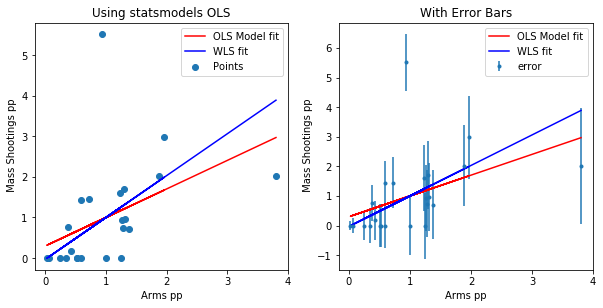

In [53]:
fig = pl.figure(figsize=(10,10))
ax = fig.add_subplot(221)
ax.scatter(gunControl['magarmspp'],gunControl['magMassShootpp'], label = "Points")
ax.plot(gunControl['magarmspp'], smfit.fittedvalues, 'r', label = "OLS Model fit")
ax.plot(gunControl['magarmspp'], wmfit.fittedvalues, 'b', 
         label = "WLS fit")
ax.set_xlabel('Arms pp')
ax.set_ylabel(' Mass Shootings pp')
ax.set_title('Using statsmodels OLS')
ax.legend()
ax2 = fig.add_subplot(222)
ax2.plot(gunControl['magarmspp'], smfit.fittedvalues, 'r', label = "OLS Model fit")
ax2.plot(gunControl['magarmspp'], wmfit.fittedvalues, 'b', 
         label = "WLS fit")
ax2.errorbar(gunControl['magarmspp'], gunControl['magMassShootpp'], yerr=errors(gunControl['magarmspp']), fmt='.',label = "error")
ax2.set_xlabel('Arms pp')
ax2.set_ylabel(' Mass Shootings pp') 
ax2.set_title('With Error Bars')
ax2.legend()

Here we see the graphs of the different fits we used to model our data. From our summary tables, we see the WLS Model had a higher R squared value, probably because it took the outlier of the US less into account compared to when we don't weight the values of higher magnitude in the OLS fit.

We see the slope of the blue WLS model is more steep to account for values more accurately due to the weights. Our errors also get larger as the Arms per person increases, perhaps this has an effect on why the slope is more steep in our WLS model fit.

In [63]:
### creating a function that calculates the residuals and minimizing that function

In [57]:
x = gunControl['magarmspp'] 
y = gunControl['magMassShootpp']

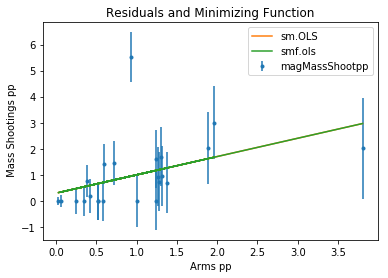

In [65]:
# from assignment 2
# statsmodels.formula.api accepts dictionaris, pandas dataframes, and python rec arrays as input: 
# all data types that host data paired with labels
smfmodel = smf.ols('y ~ x + const', data={'x':x, 'y':y, 'const':np.ones(len(x))}).fit()
pl.errorbar(x, y, yerr=errors(x), fmt='.')
pl.plot(x, smfit.fittedvalues, '-', label="sm.OLS")
pl.plot(x, smfmodel.fittedvalues, '-', label="smf.ols")
pl.xlabel('Arms pp')
pl.ylabel(' Mass Shootings pp')
pl.title('Residuals and Minimizing Function')
pl.legend();

Here is the residual plot to see the distance from the fitted line in our model. We also see the variance of the error bars. Which grow as we go farther from 0.

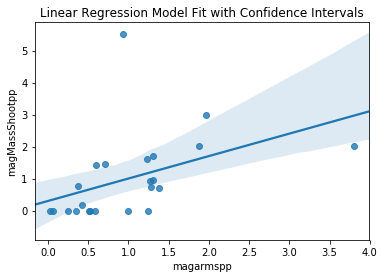

In [59]:
#Plot data and a linear regression model fit to show the confidence intervals
sns.regplot(x='magarmspp', y="magMassShootpp", data=gunControl)
plt.title('Linear Regression Model Fit with Confidence Intervals')

Here we see the confidence intervals for each value. We see that the confidence interval is relatively narrow for the values around 0-1 in average arms per person. However when we approach the outlier to the right, we see the confidence interval grow indicating that this perhaps an outlier we should remove.

## Use the stsatsmodels.gaphics package to plot the influence plot.

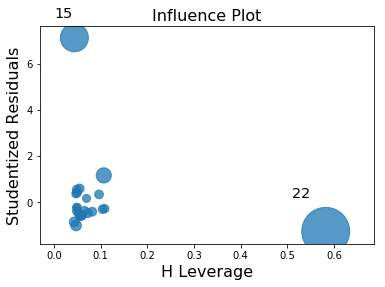

In [60]:
sm.graphics.influence_plot(smfit, alpha  = 0.05, criterion="cooks");

Here we see how our model is influenced by values. The bubble is defined by the combination of large residuals and a high influence value. This is aligned with the two outliers in our confidence interval above. Where point 22 and 15 differ with regard to relevant or should perhaps be removed is with their points of leverage.  

The United States is an outlier that has a large influence, where New Zealand is also an outlier but does not. Perhaps this is because of the disproportionate number of mass shootings comparatively. One is 3, the other is 78.

In [61]:
gunControl[gunControl.index == 15]

,Country Name,pop,gdp,Number of homicides by firearm,Average total all civilian firearms,Guns per 100 inhabitants,Number of mass shootings (1983-2013),shootingspp,armspp,homicidepp,magMassShootpp,magarmspp
15,New Zealand,4408100.0,1.761929e+11,7.0,925000.0,22.6,3,0.000681,209.840975,0.001588,5.507578,0.928434


In [62]:

gunControl[gunControl['Country Name'] == 'United States']

,Country Name,pop,gdp,Number of homicides by firearm,Average total all civilian firearms,Guns per 100 inhabitants,Number of mass shootings (1983-2013),shootingspp,armspp,homicidepp,magMassShootpp,magarmspp
22,United States,313993272.0,1.615526e+13,9146.0,270000000.0,88.8,78,0.000248,859.891036,0.029128,2.01032,3.804559


## Extra credit: calculate the confidence interval by hand and also plot them

1) confidence interval of the model parameters slope and intercept: define sigma as the sum of the residuals over the square root of number n of observations.

sigma: σ̂ =sqrt(Sum((Yoberved_i−Ypredicted_i)^2)/n)

where the sum is over all observations

Define t_alpha/2,n-2 the t statistics at (1-alpha/2) for a t distribution with n-2 degrees of freedom (you can calculate it with scipy tp = sp.stats.t.ppf(0.975, n-2)

In [ ]:
def weights(x):
    var = np.sqrt(np.std(x))
    x = 1 / (x * var)
    return x

In [68]:
len(smfit.fittedvalues)

23

In [81]:
sigma(y)

1.1479169408985268

In [84]:
x.mean()

1.0000000000000002

In [83]:
x = gunControl['magarmspp'] 
y = gunControl['magMassShootpp']
n = len(smfit.fittedvalues)
# Make sigma
def sigma(y):
    var = ((y - smfit.fittedvalues)**2)/n
    return np.sqrt(sum(var))

In [87]:
param

270516970240837.3

In [90]:
x - x.mean()

0    -0.406634
1     0.312121
2    -0.284340
3     0.266842
4    -0.485672
5     0.961355
6     0.280310
7     0.375325
8     0.001463
9    -0.750241
10    0.241603
11   -0.653702
12   -0.479822
13   -0.975387
14   -0.416678
15   -0.071566
16    0.234266
17   -0.940718
18   -0.621295
19   -0.574325
20    0.301399
21    0.881136
22    2.804559
Name: magarmspp, dtype: float64

In [92]:
np.sqrt(sum(x - x.mean())**2)

4.440892098500626e-15

In [ ]:
bottom

In [86]:
top = np.sqrt(n)*sigma(y)
bottom = np.sqrt(n-2) * np.sqrt(sum(x - x.mean())**2)

param = top/bottom

tp = sp.stats.t.ppf(0.975, len(smfit.fittedvalues)-2)

In [ ]:
smfit.params[0]+tp*param

In [93]:
tp*param

562570836546626.25

In [ ]:
this number does not seem right...

In [ ]:
#to plot
pylab.fill_between(x, yfit - ci, yfit + ci, alpha=0.5)
